<a href="https://colab.research.google.com/github/kliang696/Bank-Churn-Analysis/blob/main/bank_churn_analysis_ROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis and Data Cleaning

### Part 1 Data Exploration

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = pd.read_csv("/content/drive/MyDrive/BankChurnAnalysis/BankChurners.csv")

In [29]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### 1.1 What’s the shape of this dataset? How many features do we have in this dataset? Is there any null values?

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [31]:
df.shape

(10127, 23)

In this dataset,it involves 23 features. we have 23 columns with 10127 rows and based on the talbe above, we don't have any null values.




#### 1.2 Is there any data that we need to remove in this dataset?

In [32]:
df = df.drop(df.columns[[-1, -2]],axis = 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In this dataset, the last two columns are not needed, so we remove them to keep data organized and clean

#### 1.3 Shall we convert any of the categorical variables to numerical in order to get better results? 

In [33]:
df["Attrition_Flag"].replace(['Existing Customer', 'Attrited Customer'],[0, 1], inplace=True)
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [34]:
df["Gender"].replace(['F', 'M'],[0, 1], inplace=True)
df["Gender"].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [35]:
df['Education_Level'].replace(['Uneducated', 'High School','College','Graduate','Post-Graduate','Doctorate','Unknown'],[0, 1, 2, 3, 4,5,np.nan], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    3128
1.0    2013
NaN    1519
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [36]:
df['Education_Level'].replace([np.nan],[3], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    4647
1.0    2013
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [37]:
df["Income_Category"].replace(['Less than $40K', '$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'],[0, 1, 2, 3, 4,np.nan], inplace=True)
df['Income_Category'].value_counts(dropna=False)

0.0    3561
1.0    1790
3.0    1535
2.0    1402
NaN    1112
4.0     727
Name: Income_Category, dtype: int64

In [38]:
df["Income_Category"].replace([np.nan],[0], inplace=True)
df['Income_Category'].value_counts()

0.0    4673
1.0    1790
3.0    1535
2.0    1402
4.0     727
Name: Income_Category, dtype: int64

In [39]:
df["Card_Category"].replace(['Blue', 'Silver', 'Gold', 'Platinum'],[0, 1, 2, 3], inplace=True)
df["Card_Category"].value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

In this section, we convert all the categorical to numerical values.

#### 1.4 If this dataset is imbalanced?

In [40]:
target = df["Attrition_Flag"] # Target variable

In [41]:
target.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

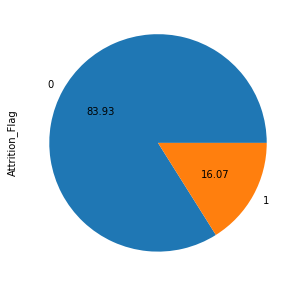

In [42]:
target.value_counts().plot.pie(autopct='%.2f',figsize=(6, 5))

*   As we can see, this dataset is not balanced at all where lable 0 make up the majority of the dataset and leaving lable 1 fewer examples. 

*   It will casue problems becasue a biased model will be built based on imbalanced data which is accurate to predict the majority class but fails to predict the minority class.

* This problem will be resolved using random-over sampling technique.





### Part 2 Data Exploration for categorical data
#### CountPlot for numerical data

In [43]:
df_cat = df[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]

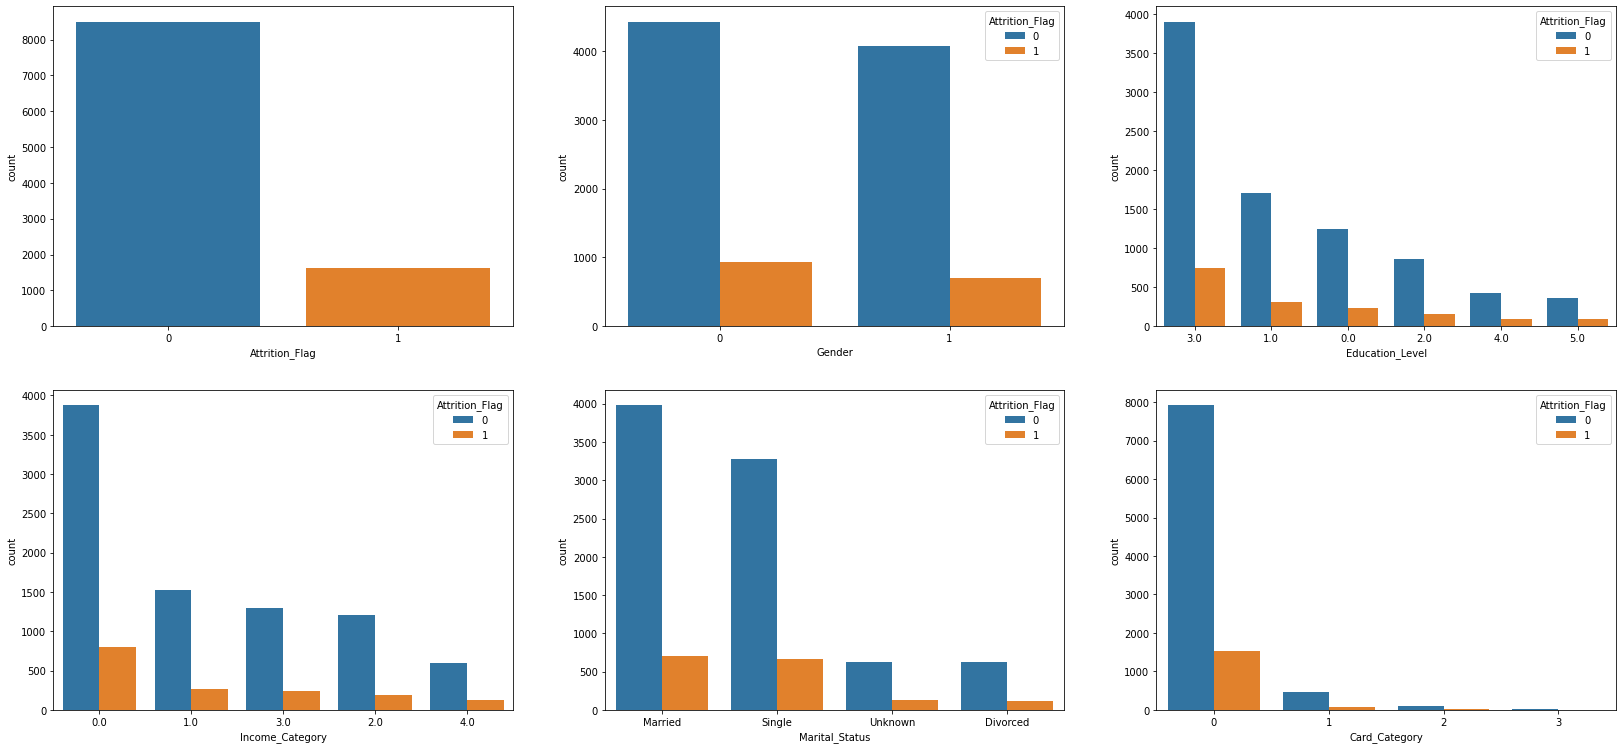

In [44]:
plt.figure(figsize=(28, 20))

plt.subplot(3,3,1)
sns.countplot(x=df["Attrition_Flag"],data=df)
plt.subplot(3,3,2)
sns.countplot(x=df["Gender"],hue="Attrition_Flag",order = df['Gender'].value_counts().index,data=df)
plt.subplot(3,3,3)
ax2 = sns.countplot(x=df["Education_Level"],hue="Attrition_Flag",order = df['Education_Level'].value_counts().index, data=df)
plt.subplot(3,3,4)
ax3 = sns.countplot(x=df["Income_Category"],hue="Attrition_Flag",order = df['Income_Category'].value_counts().index,data=df)
plt.subplot(3,3,5)
ax4 = sns.countplot(x=df["Marital_Status"],hue="Attrition_Flag",order = df['Marital_Status'].value_counts().index,data=df)
plt.subplot(3,3,6)
ax5 = sns.countplot(x=df["Card_Category"],hue="Attrition_Flag",order = df['Card_Category'].value_counts().index,data=df)




#### 2.1 For married customer vs single customer, which group has higher churn rate?

In [45]:
pd.crosstab(df["Marital_Status"],df['Attrition_Flag'],normalize=True)

Attrition_Flag,0,1
Marital_Status,,
Divorced,0.061914,0.011948
Married,0.392811,0.070011
Single,0.323393,0.065962
Unknown,0.061222,0.012738


From the table above we can tell that married customer's churn rate is 7%, which is greater than singer's churn rate 6.5%

#### 2.2 Which education level has the highest churn rate?

In [46]:
pd.crosstab(df["Education_Level"],df['Attrition_Flag'],normalize=True)

Attrition_Flag,0,1
Education_Level,,
0.0,0.123432,0.023403
1.0,0.168559,0.030216
2.0,0.084823,0.015207
3.0,0.385504,0.073368
4.0,0.041868,0.009085
5.0,0.035154,0.009381


From the crosstab above, the graduate(3) has the higherst churn rate 4.8%.

### Part 3 Data Exploration for numerical data
#### Plot histogram of numerical data

In [47]:
df_num = df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

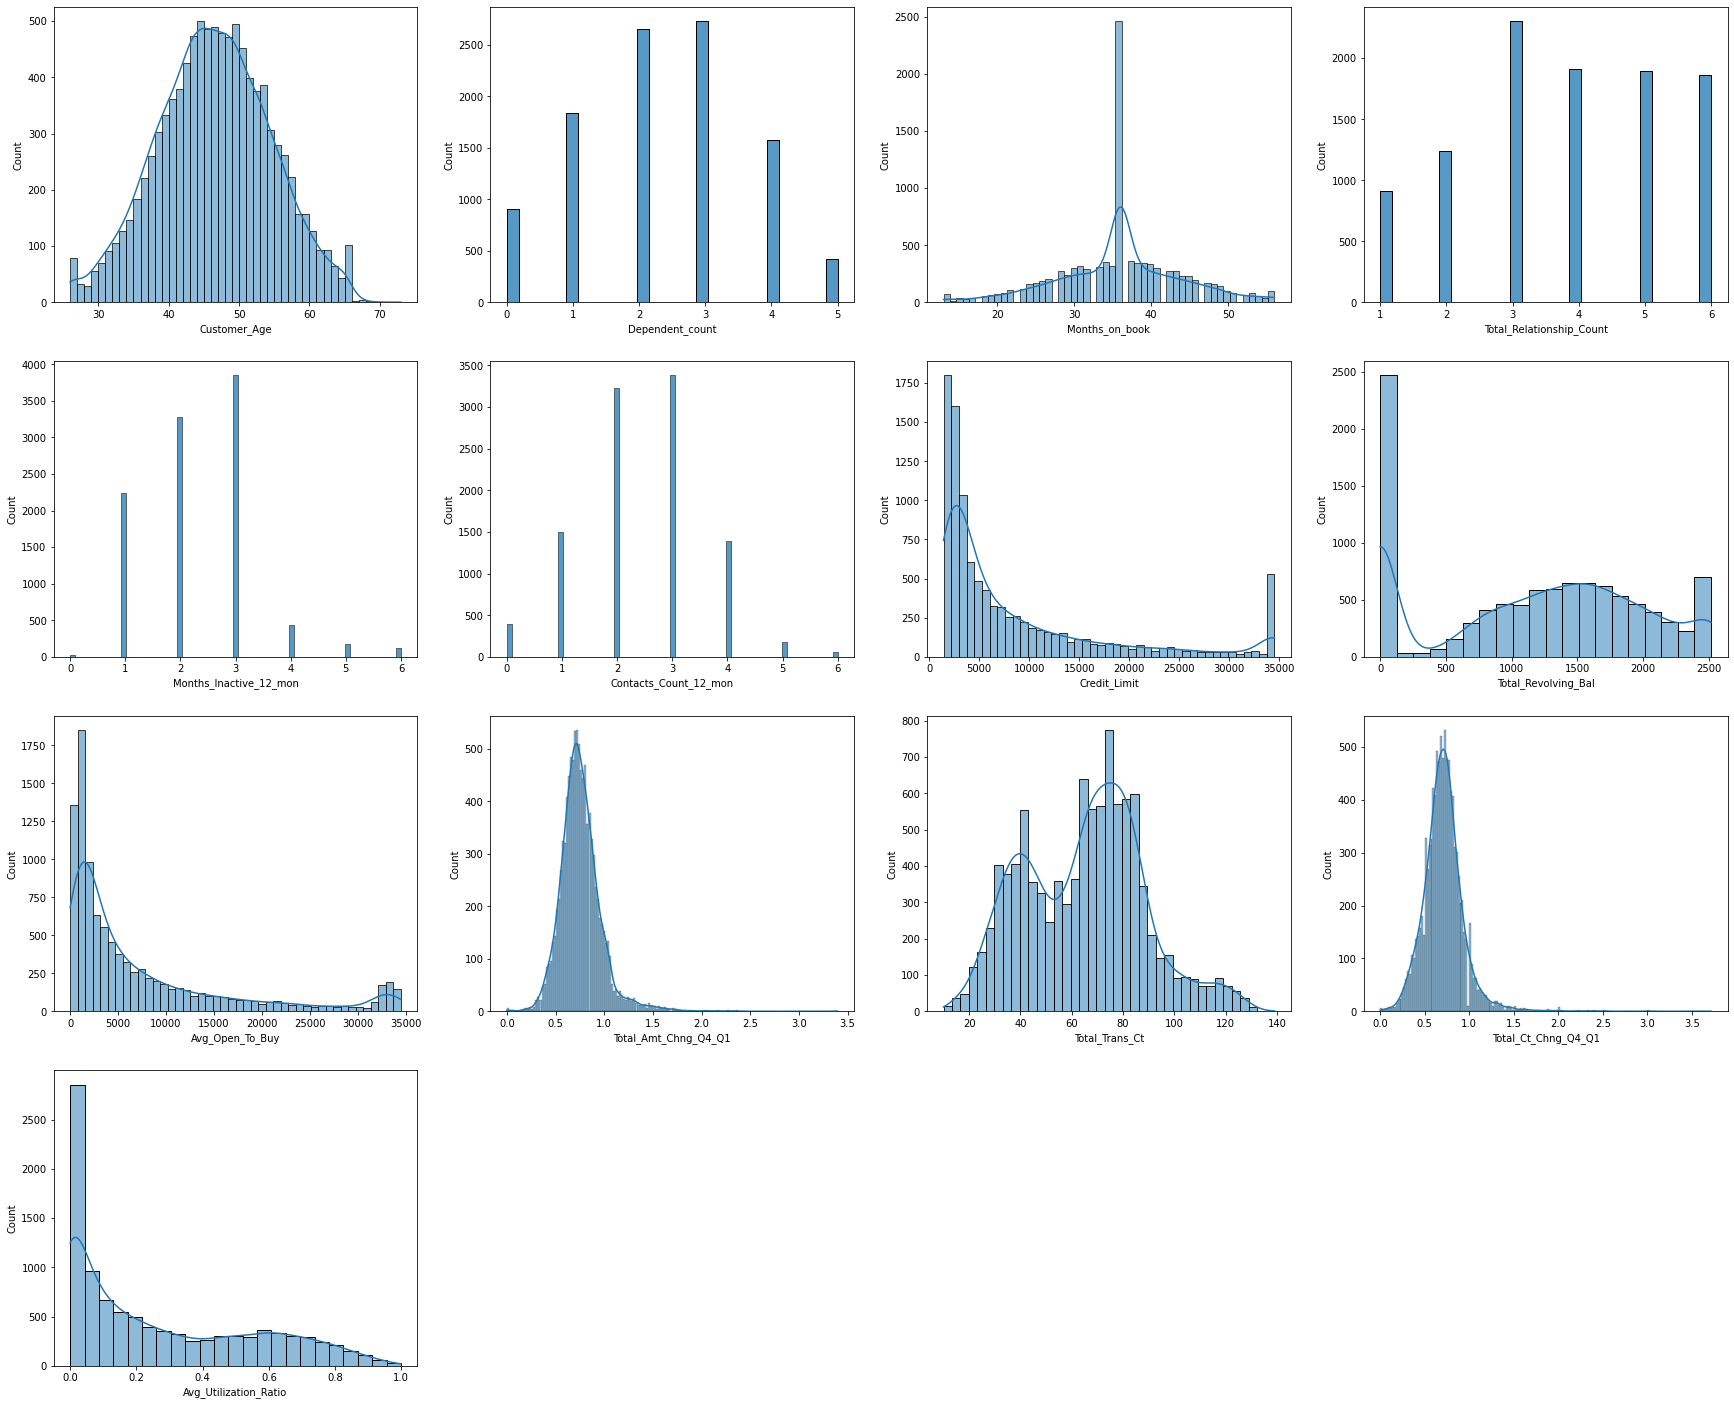

In [48]:
plt.figure(figsize=(30, 25))

plt.subplot(4,4,1)
sns.histplot(x=df_num["Customer_Age"],kde=True,data=df)
plt.subplot(4,4,2)
sns.histplot(x=df_num["Dependent_count"],kde=False,data=df)
plt.subplot(4,4,3)
sns.histplot(x=df_num["Months_on_book"],kde=True,data=df)
plt.subplot(4,4,4)
sns.histplot(x=df_num["Total_Relationship_Count"],kde=False,data=df)
plt.subplot(4,4,5)
sns.histplot(x=df_num["Months_Inactive_12_mon"],kde=False,data=df)
plt.subplot(4,4,6)
sns.histplot(x=df_num["Contacts_Count_12_mon"],kde=False,data=df)
plt.subplot(4,4,7)
sns.histplot(x=df_num["Credit_Limit"],kde=True,data=df)
plt.subplot(4,4,8)
sns.histplot(x=df_num["Total_Revolving_Bal"],kde=True,data=df)
plt.subplot(4,4,9)
sns.histplot(x=df_num["Avg_Open_To_Buy"],kde=True,data=df)
plt.subplot(4,4,10)
sns.histplot(x=df_num["Total_Amt_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,11)
sns.histplot(x=df_num["Total_Trans_Ct"],kde=True,data=df)
plt.subplot(4,4,12)
sns.histplot(x=df_num["Total_Ct_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,13)
sns.histplot(x=df_num["Avg_Utilization_Ratio"],kde=True,data=df)


#### 3.1 Is there any outliers in any of these features in this dataset?

From the histograms above, we do not notice any outliers.

#### 3.2 Heatmap for numerical data

In [49]:
df_num["Flag"]=df['Attrition_Flag']


In [50]:
df_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


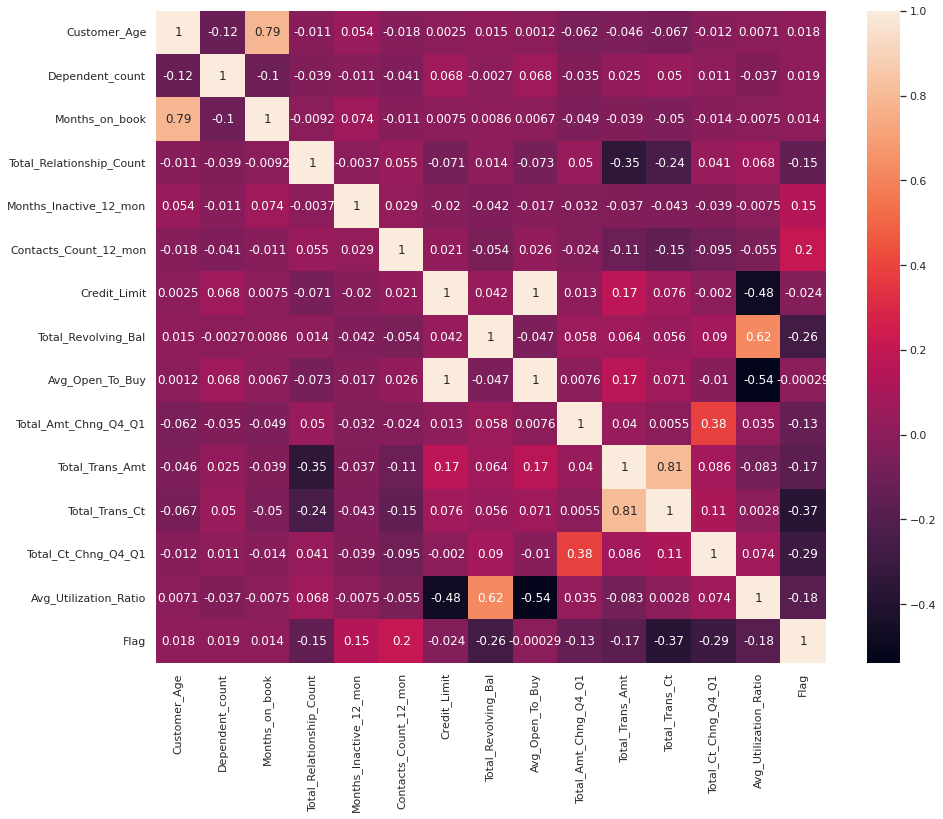

In [51]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df_num.corr(),annot=True)

#### 3.3 What are the top 5 features that most correlated on churn?

Based on the heat map above, the top 3 featreus with the highest correaltion numbers are: 


*   Total_Trans_ct
*   Total_Ct_Chng_Q4_Q1
*   Total_Revolving_Bal
*   Avg_Utilization_Ratio
*   Total_Trans_Amt






#Feature Enginearing

In [52]:
df["Recolving_Bal_Per_Relationship"]=df["Total_Revolving_Bal"]/df["Total_Relationship_Count"]

In [53]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship
0,768805383,0,45,1,3,1.0,Married,2.0,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,155.4
1,818770008,0,49,0,5,3.0,Single,0.0,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,144.0
2,713982108,0,51,1,3,3.0,Married,3.0,0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0
3,769911858,0,40,0,4,1.0,Unknown,0.0,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,839.0
4,709106358,0,40,1,3,0.0,Married,2.0,0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0


In [54]:
df1 = pd.get_dummies(df, columns=['Marital_Status'],drop_first=True,prefix='Is')
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
0,768805383,0,45,1,3,1.0,2.0,0,39,5,...,11914.0,1.335,1144,42,1.625,0.061,155.4,1,0,0
1,818770008,0,49,0,5,3.0,0.0,0,44,6,...,7392.0,1.541,1291,33,3.714,0.105,144.0,0,1,0
2,713982108,0,51,1,3,3.0,3.0,0,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0.0,1,0,0
3,769911858,0,40,0,4,1.0,0.0,0,34,3,...,796.0,1.405,1171,20,2.333,0.760,839.0,0,0,1
4,709106358,0,40,1,3,0.0,2.0,0,21,5,...,4716.0,2.175,816,28,2.500,0.000,0.0,1,0,0


# Model1: Logistic Regression 

## Import packages

In [55]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 18.4 MB/s 


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import shap


In [57]:
X = df1.iloc[:,2:] # Features
y = df1["Attrition_Flag"] # Target variable

## split without random sampling

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

## over sampling

In [59]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) 
X_res_os, y_res_os = ros.fit_resample(X_train, y_train)
y_res_os.value_counts()

0    6777
1    6777
Name: Attrition_Flag, dtype: int64

In [60]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=223)

## Build model

In [61]:
logreg = LogisticRegression(max_iter=1000,solver="liblinear")
logreg.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=1000, solver='liblinear')

In [62]:
y_pred_logreg_org = logreg.predict(X_test)

y_pred_proba_logreg_org = logreg.predict_proba(X_test)[:, 1]


In [63]:
y_pred_logreg_test_os = logreg.predict(X_test_os)

y_pred_proba_logreg_test_os = logreg.predict_proba(X_test_os)[:, 1]

In [64]:
y_pred_logreg_train_os = logreg.predict(X_train_os)

y_pred_proba_logreg_train_os = logreg.predict_proba(X_train_os)[:, 1]

## Confusion Matrix

In [65]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test_os, y_pred_logreg_test_os)
cnf_matrix

array([[1138,  215],
       [ 194, 1164]])

## Classification Report

In [66]:
print(classification_report(y_test_os, y_pred_logreg_test_os))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1353
           1       0.84      0.86      0.85      1358

    accuracy                           0.85      2711
   macro avg       0.85      0.85      0.85      2711
weighted avg       0.85      0.85      0.85      2711



In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg_org))

Accuracy: 0.8405725567620927


## Precision Recall Curve and Average Precision Score

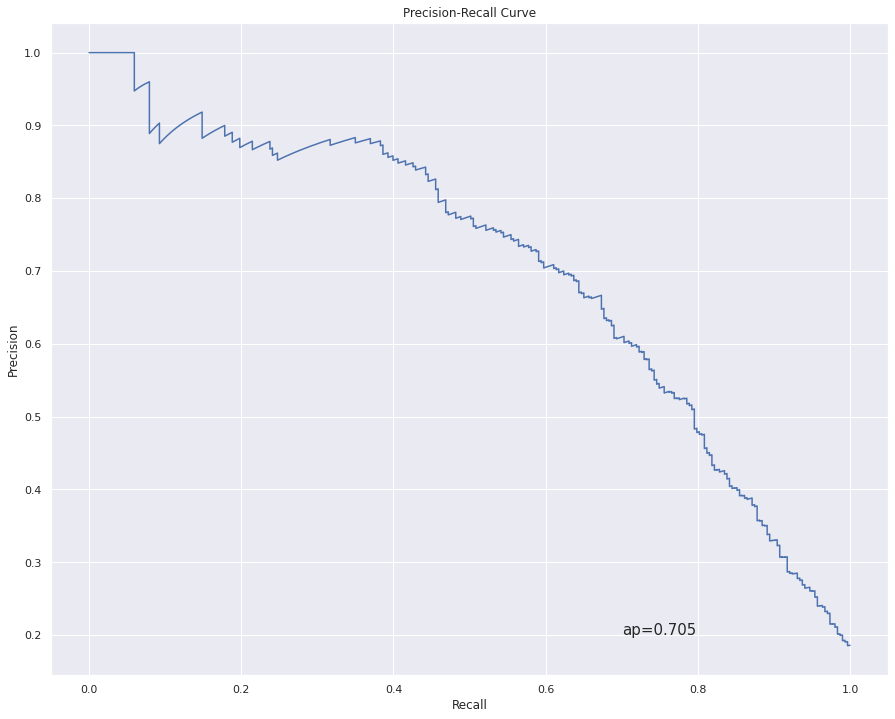

In [68]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_logreg_org)

ap_train=np.round(average_precision_score(y_test, y_pred_proba_logreg_org),3)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.text(0.7, 0.2,'ap=' + str(ap_train) , fontsize=15) 

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve and roc_auc score

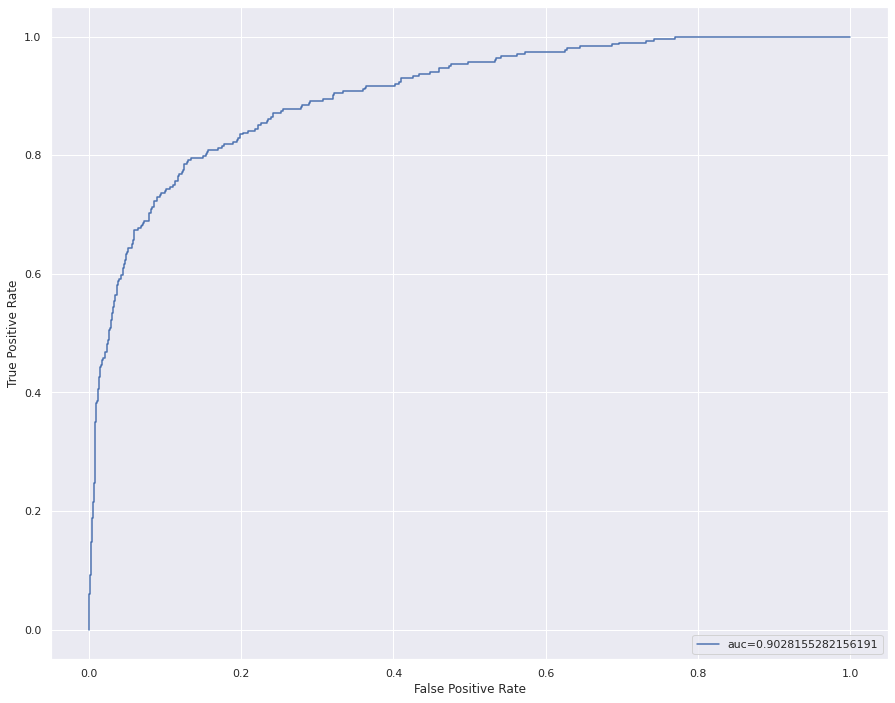

In [69]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_logreg_org)
#create ROC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba_logreg_org)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Feature Importance

In [70]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [71]:
results = permutation_importance(logreg, X_test, y_test, scoring='average_precision')

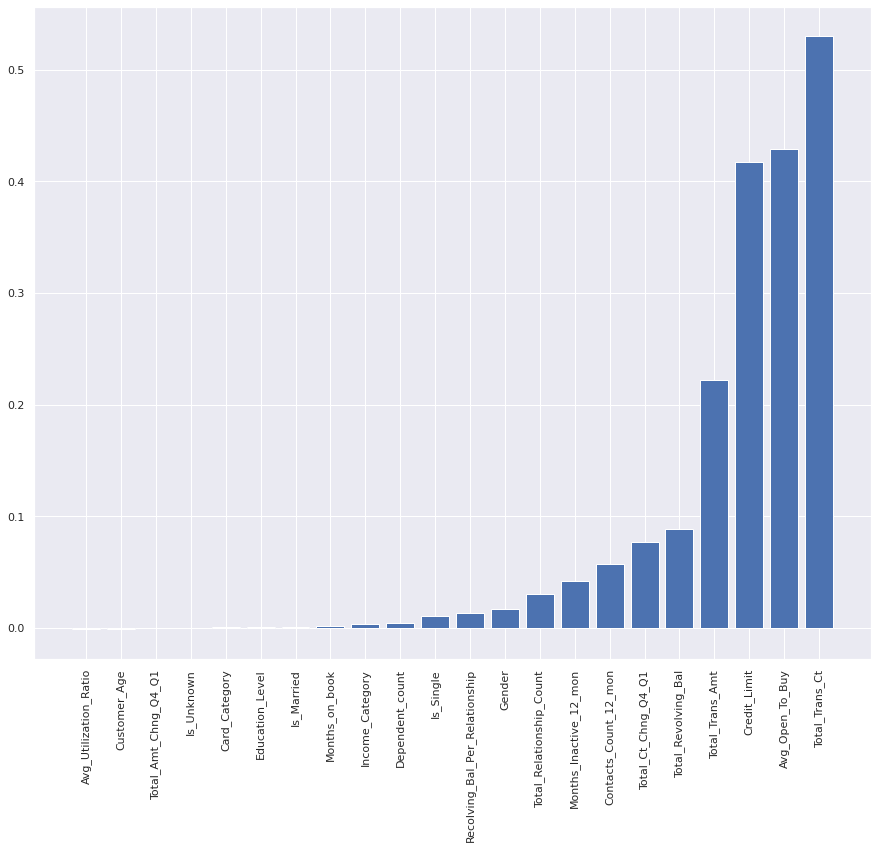

In [72]:
df_plot=pd.DataFrame({"features":X_test.columns,"importance":results.importances_mean})
df_plot_sorted=df_plot.sort_values(by='importance')


pyplot.bar(df_plot_sorted["features"],df_plot_sorted["importance"])
pyplot.xticks(rotation='vertical')

pyplot.show()

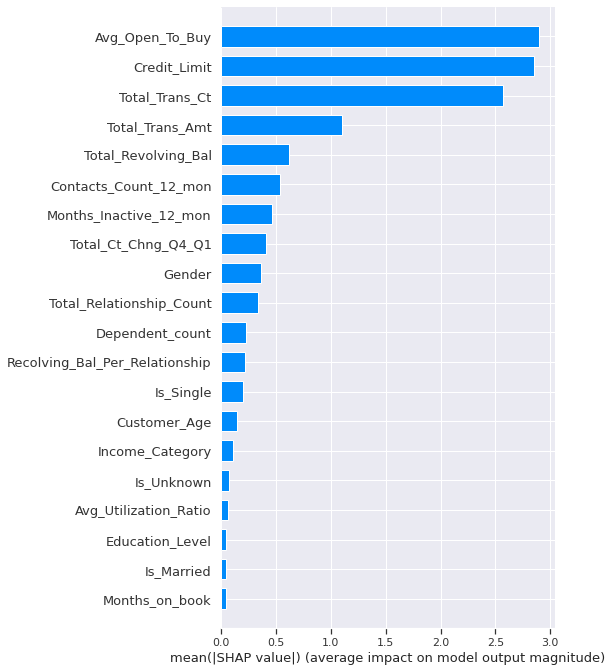

In [73]:
explainer_logreg = shap.LinearExplainer(logreg, X_train_os, feature_dependence="independent")
shap_values_logreg = explainer_logreg.shap_values(X_test)

shap.summary_plot(shap_values_logreg, X_test, plot_type="bar")

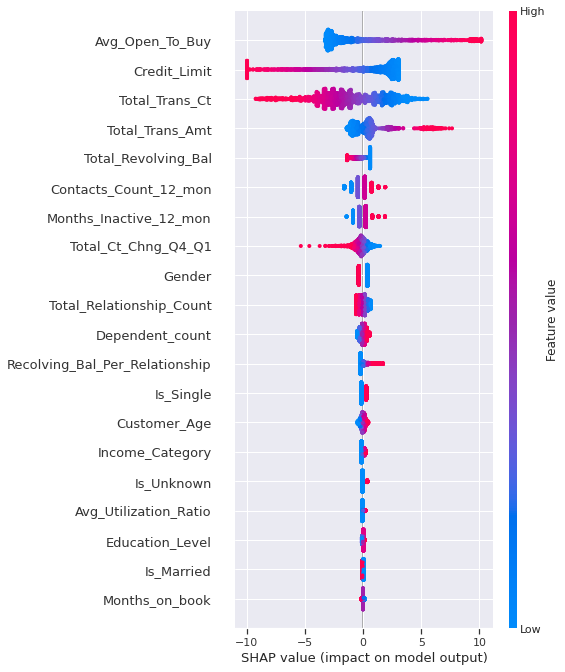

In [74]:
shap.summary_plot(shap_values_logreg, X_test)

## 5-Fold Cross Validation

In [75]:
def myplot(y_actual, y_score,mylabel):
  ap_train=np.round(average_precision_score(y_actual, y_score),3)

  precision, recall, thresholds = precision_recall_curve(y_actual, y_score)

  #create precision recall curve
  #fig, ax = plt.subplots()
  ax=sns.lineplot(recall, precision,label=mylabel)

  #ax.text(0.7, 0.2,'ap=' + str(ap_train) , fontsize=15) 
  #add axis labels to plot
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  #plt.show()

,ap_train,ap_test
0,0.926,0.709
1,0.918,0.762
2,0.921,0.751
3,0.926,0.733
4,0.924,0.691


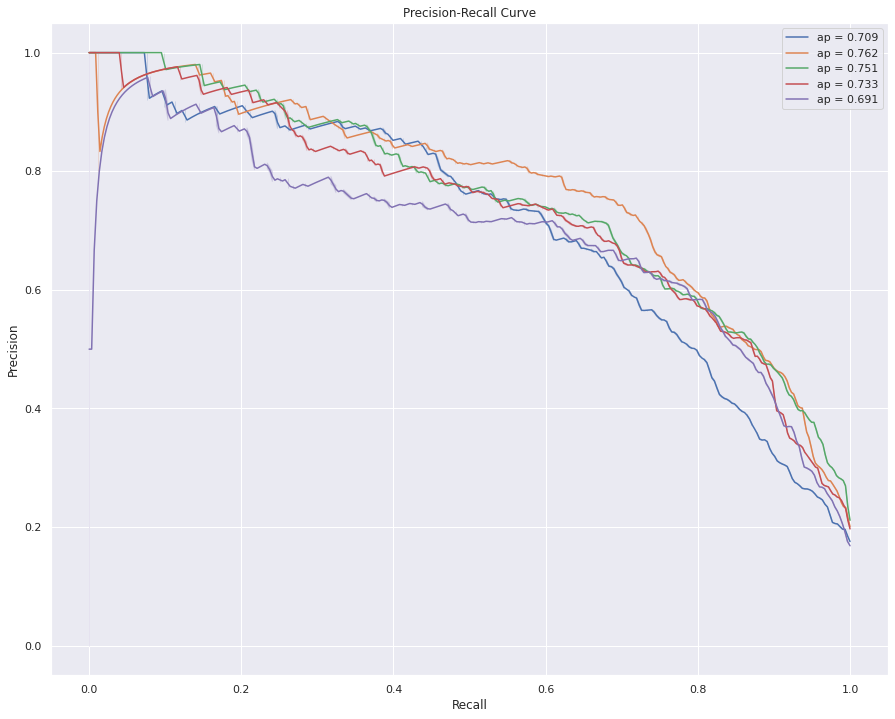

In [76]:
ap_train_list_logreg=[]
ap_test_list_logreg=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")

  logreg.fit(X_train_os, y_train_os)

  y_pred=logreg.predict(X_test)

  y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

  y_pred_proba_logreg_train = logreg.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train_os, y_pred_proba_logreg_train),3)
  ap_train_list_logreg.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_logreg),3)
  ap_test_list_logreg.append(ap_test)

  myplot(y_test, y_pred_proba_logreg,"ap = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_logreg,"ap_test":ap_test_list_logreg})
rfc_ap_df.head()

In [77]:
ap_train_list_logreg=[]
ap_test_list_logreg=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")

  logreg.fit(X_train_os, y_train_os)

  y_pred=logreg.predict(X_test)

  y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

  y_pred_proba_logreg_train = logreg.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_logreg_train),3)
  ap_train_list_logreg.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_logreg),3)
  ap_test_list_logreg.append(ap_test)

rfc_ap_df=pd.DataFrame({"roc_train":ap_train_list_logreg,"roc_test":ap_test_list_logreg})
rfc_ap_df.head()

,roc_train,roc_test
0,0.929,0.905
1,0.921,0.924
2,0.923,0.927
3,0.927,0.904
4,0.922,0.912


# Pickling the model

In [78]:
import pickle


In [79]:
pickle.dump(logreg,open('logreg.pkl', 'wb'))


In [80]:
picked_model = pickle.load(open('logreg.pkl','rb'))


In [81]:
picked_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
X_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
3698,61,1,0,4.0,1.0,1,42,4,3,2,...,15939.0,0.791,3982,68,0.943,0.000,0.000000,0,1,0
1630,35,0,2,2.0,1.0,0,29,6,1,3,...,9254.0,0.856,1830,36,0.636,0.157,287.666667,1,0,0
1978,38,0,1,3.0,1.0,0,20,5,1,3,...,2636.0,1.488,3095,63,0.969,0.488,503.400000,1,0,0
9592,32,0,0,1.0,0.0,0,21,2,3,1,...,1956.0,0.628,15574,115,0.797,0.540,1147.500000,0,1,0
9136,34,1,1,3.0,3.0,0,22,1,2,2,...,2298.0,0.175,3922,51,0.645,0.381,1413.000000,0,1,0


# Model 2: Random Forest Classfier

## Build Model

In [83]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=5,max_depth=6,criterion="entropy")

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train_os,y_train_os)

y_pred=rfc.predict(X_test)

y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

y_pred_proba_rfc_train = rfc.predict_proba(X_train)[:,1]

## Confusion Matrix

In [84]:
rfc_matrix = metrics.confusion_matrix(y_test, y_pred)
rfc_matrix

array([[1592,  135],
       [  27,  272]])

## Classification Report

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1727
           1       0.67      0.91      0.77       299

    accuracy                           0.92      2026
   macro avg       0.83      0.92      0.86      2026
weighted avg       0.94      0.92      0.92      2026



## Precision Recall Curve

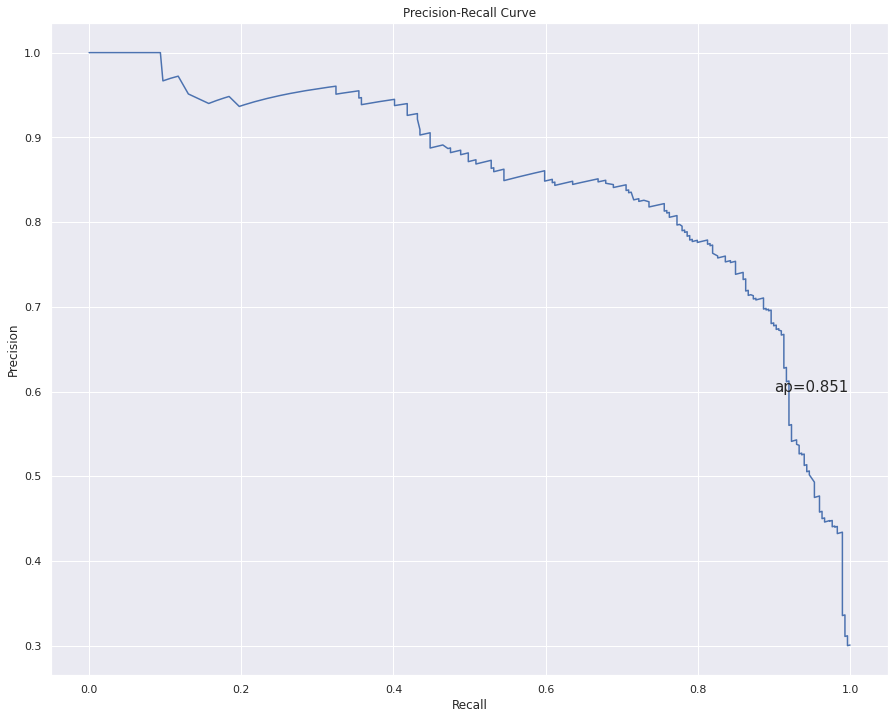

In [86]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall

ap=np.round(average_precision_score(y_test, y_pred_proba_rfc),3)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_rfc)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.text(0.9, 0.6,'ap=' + str(ap) , fontsize=15) 

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve

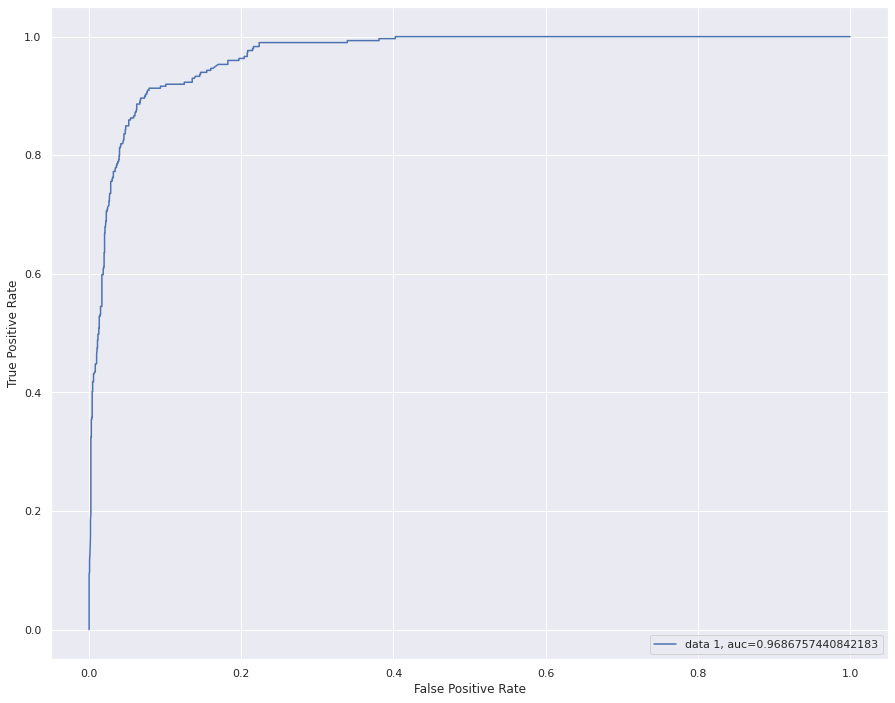

In [87]:
#define metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
#create ROC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Feature Importance

In [88]:
importances = pd.DataFrame(data={
    'Attribute': X_train_os.columns,
    'Importance': rfc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

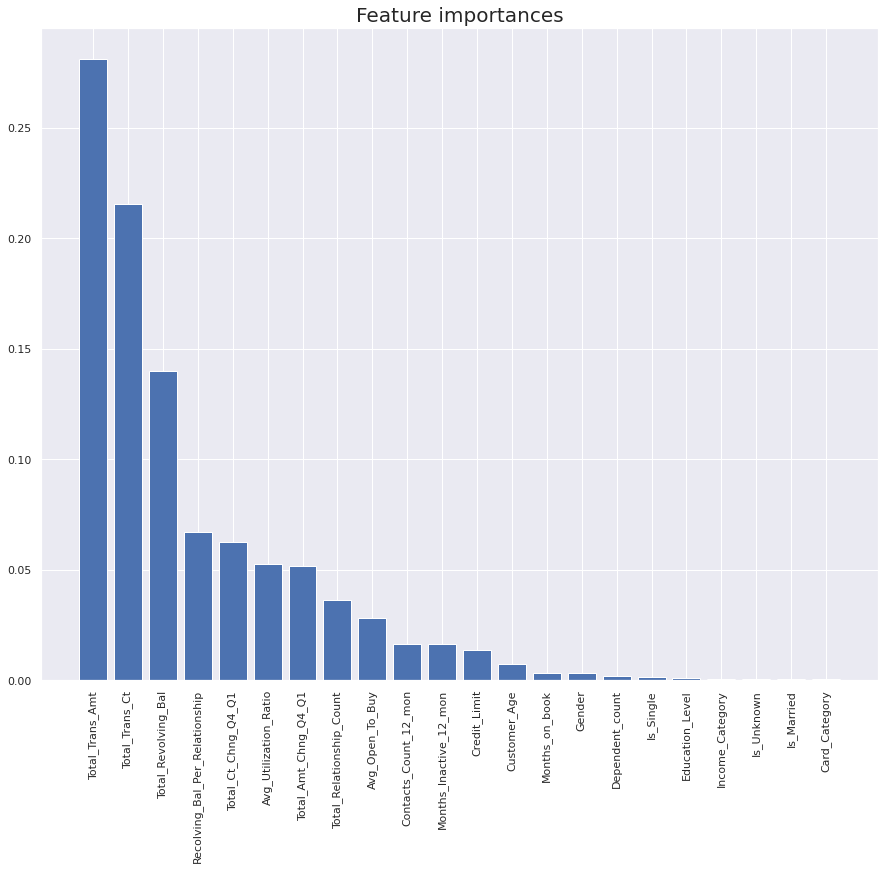

In [89]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


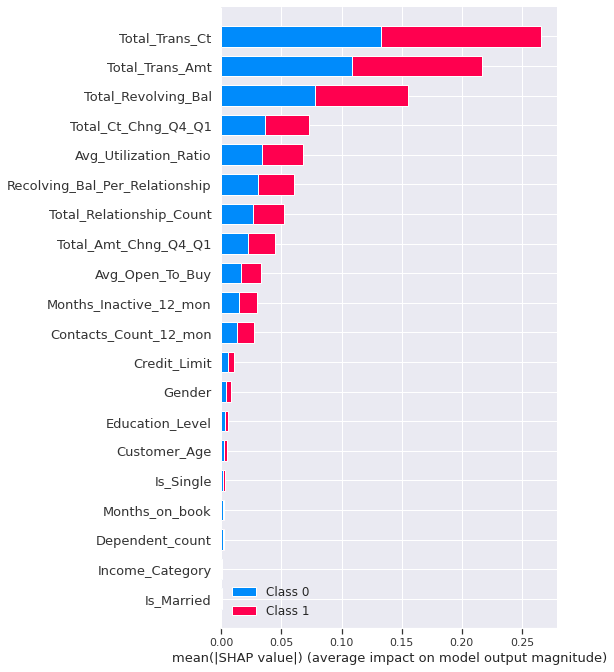

In [91]:
explainer_rfc = shap.TreeExplainer(rfc)
shap_values_rfc = explainer_rfc.shap_values(X_test)
shap.summary_plot(shap_values_rfc, X_test, plot_type="bar")

## 5-Fold cross validation

In [92]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  rfc=RandomForestClassifier(n_estimators=5,max_depth=6,criterion="entropy")

  rfc.fit(X_train_os,y_train_os)


  y_pred=rfc.predict(X_test)

  y_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]

  y_pred_proba_rfc_train = rfc.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train_os, y_pred_proba_rfc_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_rfc),3)
  ap_test_list_xgb.append(ap_test)

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})
rfc_ap_df.head()

,ap_train,ap_test
0,0.975,0.838
1,0.970,0.856
2,0.966,0.817
3,0.977,0.859
4,0.970,0.854


In [93]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  rfc=RandomForestClassifier(n_estimators=5,max_depth=6,criterion="entropy")

  rfc.fit(X_train_os,y_train_os)


  y_pred=rfc.predict(X_test)

  y_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]

  y_pred_proba_rfc_train = rfc.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_rfc_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_rfc),3)
  ap_test_list_xgb.append(ap_test)

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})
rfc_ap_df.head()

,ap_train,ap_test
0,0.975,0.959
1,0.977,0.962
2,0.969,0.960
3,0.976,0.954
4,0.974,0.971


# Model 3: XG Boost

## Build Model

In [94]:
from xgboost import XGBClassifier

XGB = XGBClassifier(max_depth=3,learning_rate=0.03)

XGB.fit(X_train_os,y_train_os)

y_pred=XGB.predict(X_test)

y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

y_pred_proba_XGB_train = XGB.predict_proba(X_train)[:, 1]


## Confusion Matrix

In [95]:
XGB_matrix = metrics.confusion_matrix(y_test, y_pred)
XGB_matrix

array([[1584,  143],
       [  23,  276]])

## classication report

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1727
           1       0.66      0.92      0.77       299

    accuracy                           0.92      2026
   macro avg       0.82      0.92      0.86      2026
weighted avg       0.94      0.92      0.92      2026



In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9180651530108588


In [98]:
average_precision_score(y_test, y_pred_proba_XGB)

0.9051679454047397

In [99]:
metrics.roc_auc_score(y_test, y_pred_proba_XGB)

0.9778900136141897

## Precision-Recall Curve

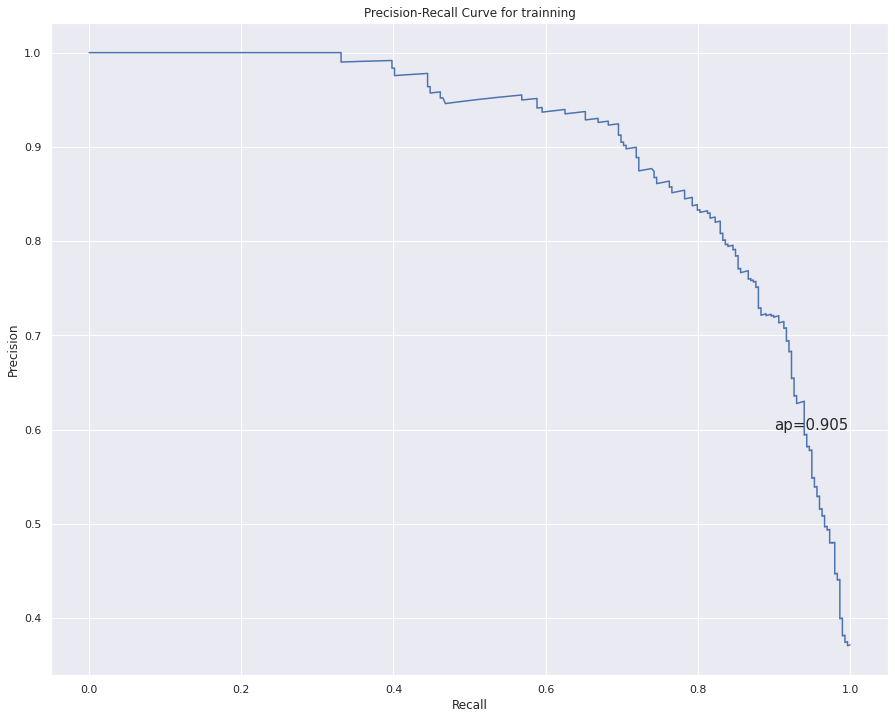

In [100]:
ap_xgb=np.round(average_precision_score(y_test, y_pred_proba_XGB),3)
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test,  y_pred_proba_XGB)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision)

#add axis labels to plot
ax.set_title('Precision-Recall Curve for trainning')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.text(0.9, 0.6,'ap=' + str(ap_xgb) , fontsize=15) 



#display plot
plt.show()

## ROC-AUC curve

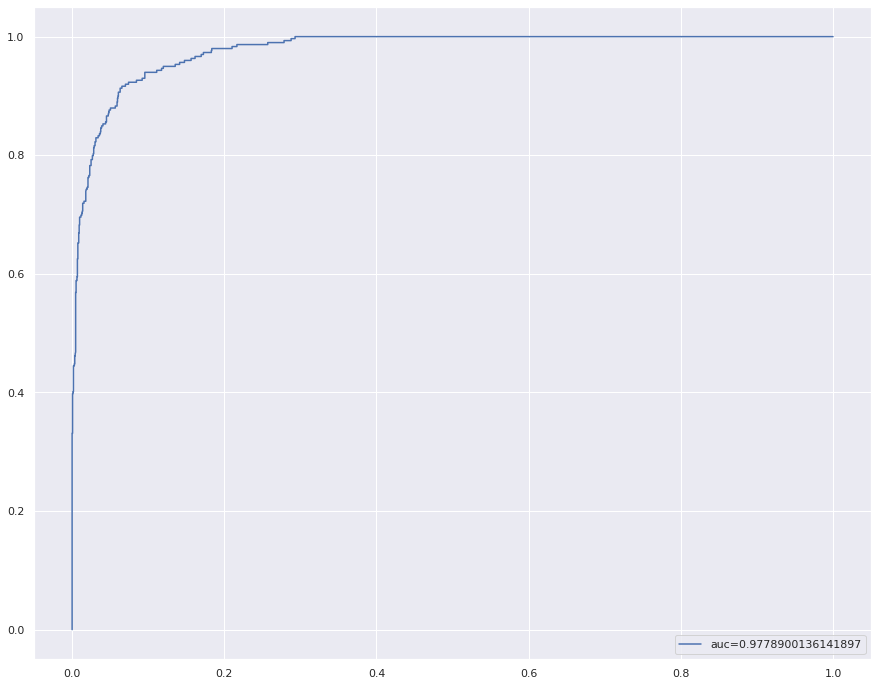

In [101]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB)
#create ROC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba_XGB)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Feature Importance

In [102]:
importances = pd.DataFrame(data={
    'Attribute': X_train_os.columns,
    'Importance': XGB.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

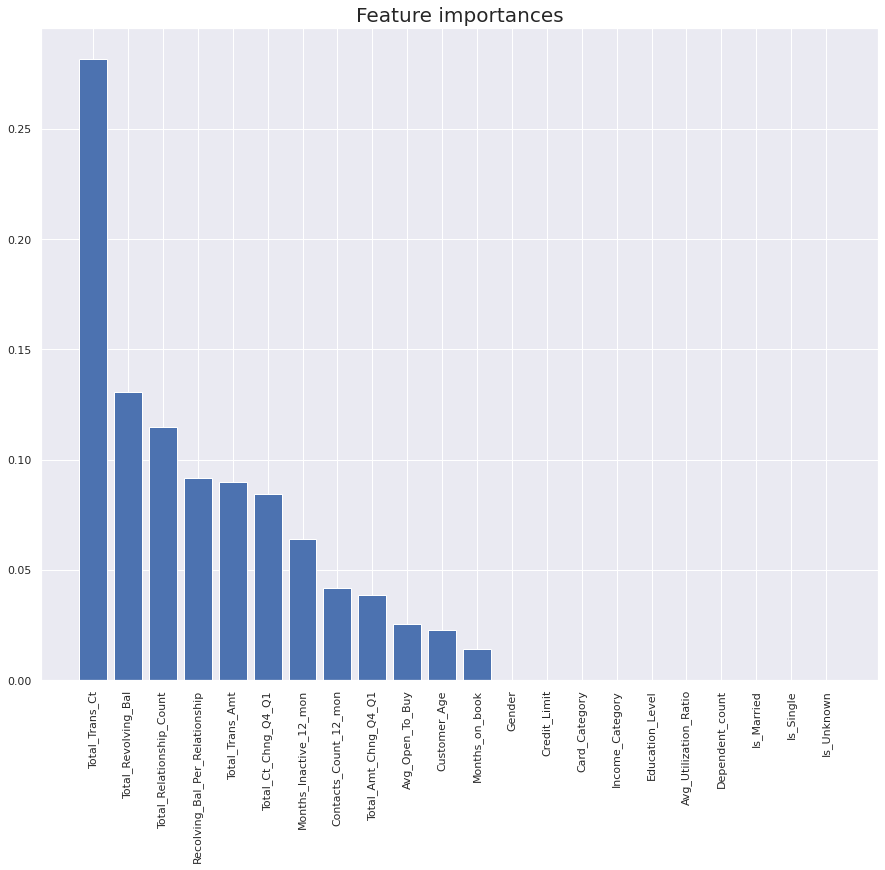

In [103]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

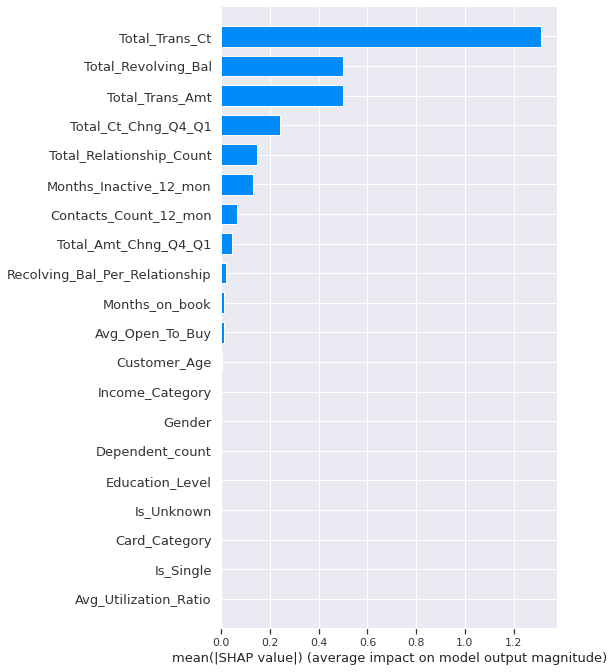

In [104]:
explainer_xgb = shap.TreeExplainer(XGB)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

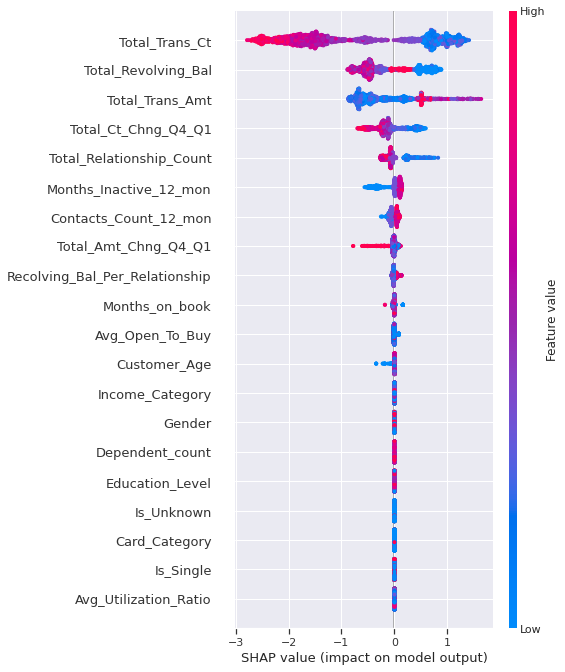

In [105]:
shap.summary_plot(shap_values_xgb, X_test)

## 5-Fold cross validation

In [106]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  XGB = XGBClassifier(max_depth=3,learning_rate=0.03)

  XGB.fit(X_train_os,y_train_os)

  y_pred=XGB.predict(X_test)

  y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

  y_pred_proba_XGB_train = XGB.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train_os, y_pred_proba_XGB_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_XGB),3)
  ap_test_list_xgb.append(ap_test)

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})
rfc_ap_df.head()

,ap_train,ap_test
0,0.983,0.900
1,0.982,0.925
2,0.981,0.908
3,0.983,0.898
4,0.982,0.906


In [107]:
roc_train_xgb=[]
roc_test_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  XGB = XGBClassifier(max_depth=3,learning_rate=0.03)

  XGB.fit(X_train_os,y_train_os)

  y_pred=XGB.predict(X_test)

  y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

  y_pred_proba_XGB_train = XGB.predict_proba(X_train_os)[:, 1]

  roc_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_XGB_train),3)
  roc_train_xgb.append(roc_train)
  
  roc_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_XGB),3)
  roc_test_xgb.append(roc_test)

rfc_ap_df=pd.DataFrame({"roc_train":roc_train_xgb,"roc_test":roc_test_xgb})
rfc_ap_df.head(20)

,roc_train,roc_test
0,0.983,0.978
1,0.983,0.982
2,0.984,0.980
3,0.985,0.975
4,0.983,0.979


# Dollar Value Evaluation

1- Focusing on your test data only (unseen data), compute the total credit limits of the customers whom your model could correctly predict their churn in the future

2.a- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model could correctly predict their churn in the future (predicted to be 1 and actually 1)

2.b- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model cannot correctly predict their churn in the future (predicted to be 0 but actually 1) (edited) 






In [108]:
X_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
3698,61,1,0,4.0,1.0,1,42,4,3,2,...,15939.0,0.791,3982,68,0.943,0.000,0.000000,0,1,0
1630,35,0,2,2.0,1.0,0,29,6,1,3,...,9254.0,0.856,1830,36,0.636,0.157,287.666667,1,0,0
1978,38,0,1,3.0,1.0,0,20,5,1,3,...,2636.0,1.488,3095,63,0.969,0.488,503.400000,1,0,0
9592,32,0,0,1.0,0.0,0,21,2,3,1,...,1956.0,0.628,15574,115,0.797,0.540,1147.500000,0,1,0
9136,34,1,1,3.0,3.0,0,22,1,2,2,...,2298.0,0.175,3922,51,0.645,0.381,1413.000000,0,1,0


In [109]:
combine_df=pd.DataFrame({"Y_actual":y_test,"Y_proba":y_pred_proba_XGB,"Dollar_Overall_Trx":X_test["Total_Trans_Amt"]})

In [110]:
combine_df.head()

,Y_actual,Y_proba,Dollar_Overall_Trx
3698,0,0.093947,3982
1630,0,0.205709,1830
1978,0,0.292886,3095
9592,0,0.083356,15574
9136,1,0.808486,3922


In [111]:
for i in range(1,10):
  step=i/10
  col_name="Y_predict_"+str(step)
  combine_df[col_name]=1*(combine_df['Y_proba']>step)

In [112]:
combine_df.head()

,Y_actual,Y_proba,Dollar_Overall_Trx,Y_predict_0.1,Y_predict_0.2,Y_predict_0.3,Y_predict_0.4,Y_predict_0.5,Y_predict_0.6,Y_predict_0.7,Y_predict_0.8,Y_predict_0.9
3698,0,0.093947,3982,0,0,0,0,0,0,0,0,0
1630,0,0.205709,1830,1,1,0,0,0,0,0,0,0
1978,0,0.292886,3095,1,1,0,0,0,0,0,0,0
9592,0,0.083356,15574,0,0,0,0,0,0,0,0,0
9136,1,0.808486,3922,1,1,1,1,1,1,1,1,0


In [113]:


Dollar_value_11=[]
Dollar_value_01=[]
Dollar_value_10=[]

for i in range(1,10): 
  pred_name="Y_predict_"+str(i/10)
  Dollar_value_11.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_01.append(combine_df.loc[(combine_df['Y_actual']==0) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_10.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==0),'Dollar_Overall_Trx'].sum())



  

In [114]:
thresh=[]
for i in range(1,10):
  thresh.append(i/10)
thresh



[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [115]:
th_df=pd.DataFrame({"threshold":thresh,"Dollar_11":Dollar_value_11,"Dollar_10":Dollar_value_10,"Dollar_01":Dollar_value_01})

In [116]:
th_df

,threshold,Dollar_11,Dollar_10,Dollar_01
0,0.1,896142,0,2830692
1,0.2,888868,7274,1688719
2,0.3,886269,9873,994104
3,0.4,865518,30624,563356
4,0.5,822111,74031,295079
5,0.6,774169,121973,192384
6,0.7,711897,184245,132589
7,0.8,588404,307738,59507
8,0.9,283095,613047,2028


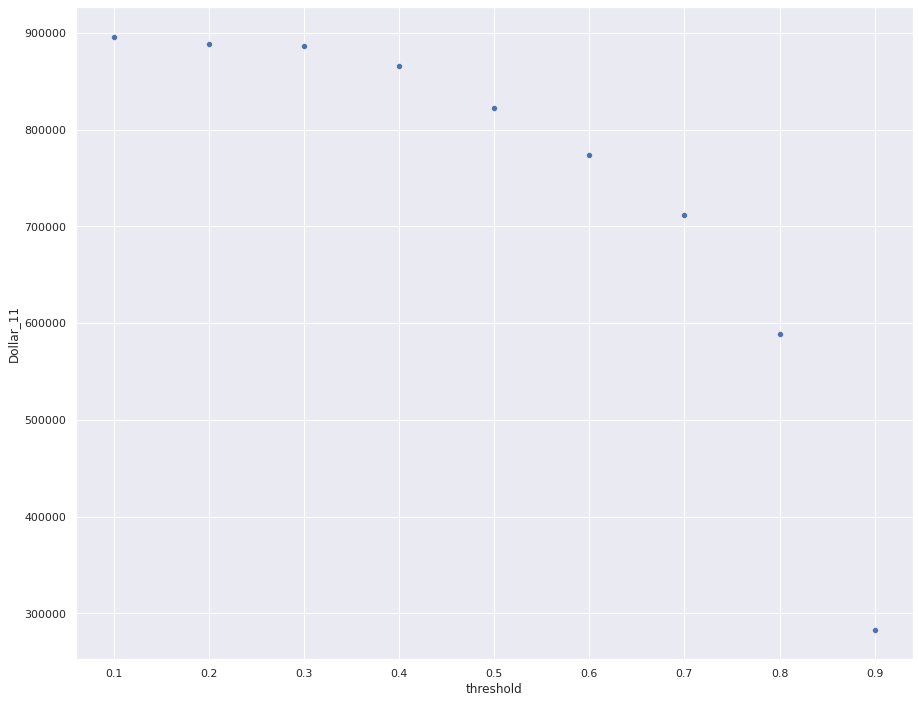

In [117]:
sns.scatterplot(th_df['threshold'],th_df['Dollar_11'])